In [1]:
Problem Scenario: ‘Marketing mix’ is a popular concept used in implementing marketing strategies. 
A marketing mix includes multiple areas of focus as part of a comprehensive marketing plan. This all 
revolves around the four Ps of marketing - product, price, place, and promotion. 

Problem Objective: As a data scientist, you should perform exploratory data analysis and hypothesis testing. 
The goal is to gain a better understanding of the various factors that contribute to customer acquisition

In [10]:
import pandas as pd

In [8]:
data_1=pd.read_csv('Data_Dictionary.csv')
data_2=pd.read_csv('marketing_data.csv')

In [9]:
print(data_1.head(2))
print(data_2.head(2))

     Variable                   Description
0          ID  Customer's unique identifier
1  Year_Birth         Customer's birth year
     ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
0  1826        1970  Graduation       Divorced  $84,835.00         0   
1     1        1961  Graduation         Single  $57,091.00         0   

   Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
0         0     6/16/14        0       189  ...                  6   
1         0     6/15/14        0       464  ...                  7   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  1             0             0             0             0   
1                  5             0             0             0             0   

   AcceptedCmp2  Response  Complain  Country  
0             0         1         0       SP  
1             1         1         0       CA  

[2 rows x 28 columns]


In [11]:
data_1.columns

Index(['Variable', 'Description'], dtype='object')

In [12]:
data_2.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [14]:
print("Data Dictionary:")
print(data_1.info())
print("\nMarketing Data:")
print(data_2.info())


Data Dictionary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Variable     28 non-null     object
 1   Description  28 non-null     object
dtypes: object(2)
memory usage: 576.0+ bytes
None

Marketing Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9  

In [15]:
print("\nData Types for 'Dt_Customer' and 'Income' in Marketing Data:")
print(data_2[['Dt_Customer', ' Income ']].dtypes)


Data Types for 'Dt_Customer' and 'Income' in Marketing Data:
Dt_Customer    object
 Income        object
dtype: object


In [16]:
print("\nSample Records for 'Dt_Customer' and 'Income' in Marketing Data:")
print(data_2[['Dt_Customer', ' Income ']].head())


Sample Records for 'Dt_Customer' and 'Income' in Marketing Data:
  Dt_Customer      Income 
0     6/16/14  $84,835.00 
1     6/15/14  $57,091.00 
2     5/13/14  $67,267.00 
3     5/11/14  $32,474.00 
4      4/8/14  $21,474.00 


In [17]:
data_2['Dt_Customer'] = pd.to_datetime(data_2['Dt_Customer'], format='%m/%d/%y')
data_2['Income'] = data_2[' Income '].str.replace('[$,]', '').astype(float)
data_2.drop(columns=[' Income '], inplace=True)
print("\nData Types for 'Dt_Customer' and 'Income' in Marketing Data After Conversion:")
print(data_2[['Dt_Customer', 'Income']].dtypes)
print("\nSample Records for 'Dt_Customer' and 'Income' in Marketing Data After Conversion:")
print(data_2[['Dt_Customer', 'Income']].head())



Data Types for 'Dt_Customer' and 'Income' in Marketing Data After Conversion:
Dt_Customer    datetime64[ns]
Income                float64
dtype: object

Sample Records for 'Dt_Customer' and 'Income' in Marketing Data After Conversion:
  Dt_Customer   Income
0  2014-06-16  84835.0
1  2014-06-15  57091.0
2  2014-05-13  67267.0
3  2014-05-11  32474.0
4  2014-04-08  21474.0


In [19]:
print("Unique categories for 'Education' in data_2:", data_2['Education'].unique())
print("Unique categories for 'Marital_Status' in data_2:", data_2['Marital_Status'].unique())


Unique categories for 'Education' in data_2: ['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']
Unique categories for 'Marital_Status' in data_2: ['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']


In [23]:
average_income_by_group = data_2.groupby(['Education', 'Marital_Status'])['Income'].mean()
def impute_income(row):
    if pd.isnull(row['Income']):
        education = row['Education']
        marital_status = row['Marital_Status']
        return average_income_by_group.loc[(education, marital_status)]
    else:
        return row['Income']
data_2['Income'] = data_2.apply(impute_income, axis=1)
print("Number of missing values in 'Income' of data_2 after imputation:", data_2['Income'].isnull().sum())

Number of missing values in 'Income' of data_2 after imputation: 0


In [32]:
data_2['Total_Children'] = data_2['Kidhome'] + data_2['Teenhome']
current_year = pd.Timestamp.now().year
data_2['Age'] = current_year - data_2['Year_Birth']
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                    'MntSweetProducts', 'MntGoldProds']
data_2['Total_Spending'] = data_2[spending_columns].sum(axis=1)
purchase_columns = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
data_2['Total_Purchases'] = data_2[purchase_columns].sum(axis=1)
print(data_2[['Total_Children', 'Age', 'Total_Spending', 'Total_Purchases']].head())

   Total_Children  Age  Total_Spending  Total_Purchases
0               0   53            1190               15
1               0   62             577               18
2               1   65             251               11
3               2   56              11                4
4               1   34              91                8


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

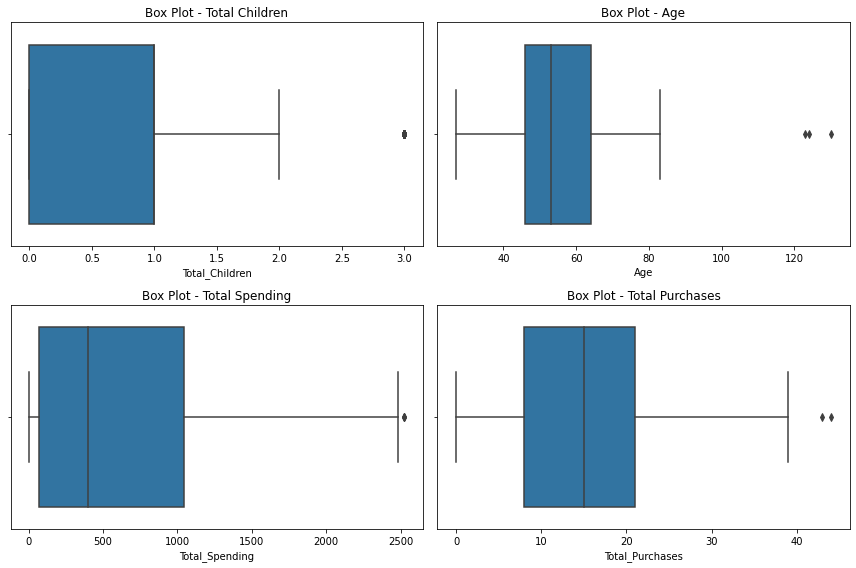

In [34]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.boxplot(x=data_2['Total_Children'])
plt.title('Box Plot - Total Children')

plt.subplot(2, 2, 2)
sns.boxplot(x=data_2['Age'])
plt.title('Box Plot - Age')

plt.subplot(2, 2, 3)
sns.boxplot(x=data_2['Total_Spending'])
plt.title('Box Plot - Total Spending')

plt.subplot(2, 2, 4)
sns.boxplot(x=data_2['Total_Purchases'])
plt.title('Box Plot - Total Purchases')

plt.tight_layout()
plt.show()

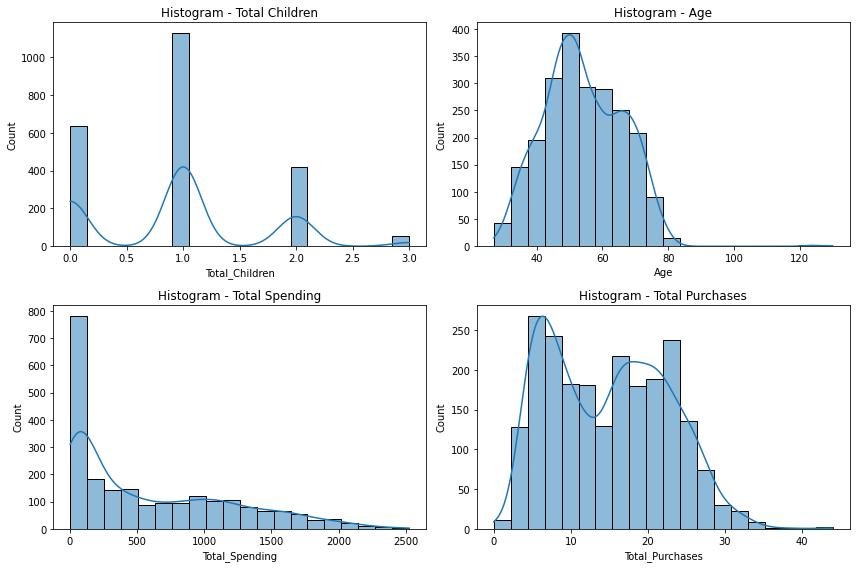

In [35]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(data_2['Total_Children'], bins=20, kde=True)
plt.title('Histogram - Total Children')

plt.subplot(2, 2, 2)
sns.histplot(data_2['Age'], bins=20, kde=True)
plt.title('Histogram - Age')

plt.subplot(2, 2, 3)
sns.histplot(data_2['Total_Spending'], bins=20, kde=True)
plt.title('Histogram - Total Spending')

plt.subplot(2, 2, 4)
sns.histplot(data_2['Total_Purchases'], bins=20, kde=True)
plt.title('Histogram - Total Purchases')

plt.tight_layout()
plt.show()


In [36]:
Q1 = data_2['Total_Spending'].quantile(0.25)
Q3 = data_2['Total_Spending'].quantile(0.75)
IQR = Q3 - Q1

upper_fence = Q3 + 1.5 * IQR
lower_fence = Q1 - 1.5 * IQR
data_2['Total_Spending'] = data_2['Total_Spending'].clip(upper=upper_fence, lower=lower_fence)

Text(0.5, 1.0, 'Box Plot - Total Children')

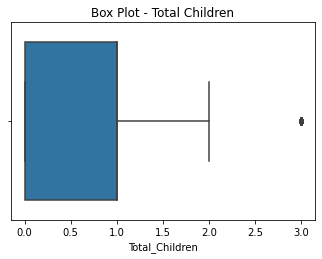

In [37]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.boxplot(x=data_2['Total_Children'])
plt.title('Box Plot - Total Children')

In [38]:
education_mapping = {'Graduate': 1, 'Post-Graduate': 2, 'High School': 3, 'PhD': 4}
data_2['Education_Encoded'] = data_2['Education'].map(education_mapping)
marital_status_mapping = {'Single': 1, 'Married': 2, 'Divorced': 3, 'Widow': 4}
data_2['Marital_Status_Encoded'] = data_2['Marital_Status'].map(marital_status_mapping)
data_2 = pd.get_dummies(data_2, columns=['Country'], prefix='Country', drop_first=True)
print(data_2.head())

      ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
0   1826        1970  Graduation       Divorced  $84,835.00         0   
1      1        1961  Graduation         Single  $57,091.00         0   
2  10476        1958  Graduation        Married  $67,267.00         0   
3   1386        1967  Graduation       Together  $32,474.00         1   
4   5371        1989  Graduation         Single  $21,474.00         1   

   Teenhome Dt_Customer  Recency  MntWines  ...  Total_Purchases  \
0         0     6/16/14        0       189  ...               15   
1         0     6/15/14        0       464  ...               18   
2         1     5/13/14        0       134  ...               11   
3         1     5/11/14        0        10  ...                4   
4         0      4/8/14        0         6  ...                8   

   Education_Encoded  Marital_Status_Encoded  Country_CA  Country_GER  \
0                NaN                     3.0           0            0   
1     

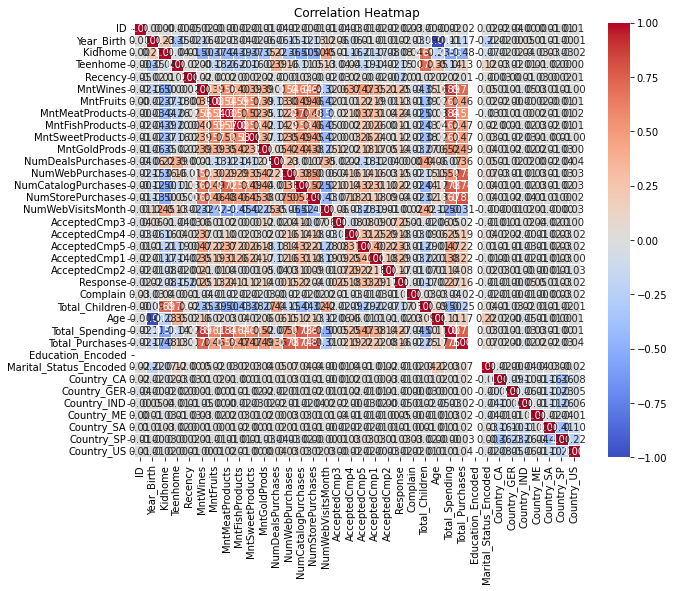

In [39]:
correlation_matrix = data_2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [41]:
import scipy.stats as stats
age_threshold = 60
younger_sample = data_2[data_2['Age'] < age_threshold]['NumWebPurchases']
older_sample = data_2[data_2['Age'] >= age_threshold]['NumWebPurchases']
t_statistic, p_value = stats.ttest_ind(younger_sample, older_sample, equal_var=False)
alpha = 0.05
print(f'Two-Sample t-test Results:')
print(f'Test Statistic: {t_statistic}')
print(f'P-value: {p_value}')
if p_value < alpha:
    print("The p-value is less than the significance level (alpha). Reject the null hypothesis.")
    print("There is a significant difference in the average number of web purchases between older and younger people.")
    print("Hypothesis: Older people are not as tech-savvy and probably prefer shopping in-store - True.")
else:
    print("The p-value is greater than the significance level (alpha). Fail to reject the null hypothesis.")
    print("There is no significant difference in the average number of web purchases between older and younger people.")
    print("Hypothesis: Older people are not as tech-savvy and probably prefer shopping in-store - False.")

Two-Sample t-test Results:
Test Statistic: -5.073797420491293
P-value: 4.397790902740524e-07
The p-value is less than the significance level (alpha). Reject the null hypothesis.
There is a significant difference in the average number of web purchases between older and younger people.
Hypothesis: Older people are not as tech-savvy and probably prefer shopping in-store - True.


In [42]:
with_kids_sample = data_2[data_2['Kidhome'] > 0]['NumWebPurchases']
without_kids_sample = data_2[data_2['Kidhome'] == 0]['NumWebPurchases']
t_statistic, p_value = stats.ttest_ind(with_kids_sample, without_kids_sample, equal_var=False)
alpha = 0.05
print(f'Two-Sample t-test Results:')
print(f'Test Statistic: {t_statistic}')
print(f'P-value: {p_value}')

if p_value < alpha:
    print("The p-value is less than the significance level (alpha). Reject the null hypothesis.")
    print("There is a significant difference in the average number of web purchases between customers with and without kids.")
    print("Hypothesis: Customers with kids probably have less time to visit a store and prefer to shop online - True.")
else:
    print("The p-value is greater than the significance level (alpha). Fail to reject the null hypothesis.")
    print("There is no significant difference in the average number of web purchases between customers with and without kids.")
    print("Hypothesis: Customers with kids probably have less time to visit a store and prefer to shop online - False.")


Two-Sample t-test Results:
Test Statistic: -19.58354459618742
P-value: 7.71401308007785e-79
The p-value is less than the significance level (alpha). Reject the null hypothesis.
There is a significant difference in the average number of web purchases between customers with and without kids.
Hypothesis: Customers with kids probably have less time to visit a store and prefer to shop online - True.


In [43]:
store_sample = data_2['NumStorePurchases']
web_sample = data_2['NumWebPurchases']
catalog_sample = data_2['NumCatalogPurchases']
f_statistic, p_value = stats.f_oneway(store_sample, web_sample, catalog_sample)
alpha = 0.05
print(f'One-Way ANOVA Results:')
print(f'F-Statistic: {f_statistic}')
print(f'P-value: {p_value}')

if p_value < alpha:
    print("The p-value is less than the significance level (alpha). Reject the null hypothesis.")
    print("There is a significant difference in the average number of purchases among different distribution channels.")
    print("Hypothesis: Other distribution channels may cannibalize sales at the store - True.")
else:
    print("The p-value is greater than the significance level (alpha). Fail to reject the null hypothesis.")
    print("There is no significant difference in the average number of purchases among different distribution channels.")
    print("Hypothesis: Other distribution channels may cannibalize sales at the store - False.")


One-Way ANOVA Results:
F-Statistic: 614.2763795960092
P-value: 1.0036088810388535e-245
The p-value is less than the significance level (alpha). Reject the null hypothesis.
There is a significant difference in the average number of purchases among different distribution channels.
Hypothesis: Other distribution channels may cannibalize sales at the store - True.


In [47]:
us_sample = data_2['Total_Purchases'][data_2['Country_US'] == 1]
other_countries_sample = data_2['Total_Purchases'][data_2['Country_US'] == 0]
t_statistic, p_value = stats.ttest_ind(us_sample, other_countries_sample, equal_var=False)
alpha = 0.05
print(f'Independent Two-Sample t-test Results:')
print(f'Test Statistic: {t_statistic}')
print(f'P-value: {p_value}')

if p_value < alpha:
    print("The p-value is less than the significance level (alpha). Reject the null hypothesis.")
    print("There is a significant difference in the average total purchases between the US and other countries.")
    print("Hypothesis: The US fares significantly better than the rest of the world in terms of total purchases - True.")
else:
    print("The p-value is greater than the significance level (alpha). Fail to reject the null hypothesis.")
    print("There is no significant difference in the average total purchases between the US and other countries.")
    print("Hypothesis: The US fares significantly better than the rest of the world in terms of total purchases - False.")


Independent Two-Sample t-test Results:
Test Statistic: 1.7015448173296306
P-value: 0.09147645042212253
The p-value is greater than the significance level (alpha). Fail to reject the null hypothesis.
There is no significant difference in the average total purchases between the US and other countries.
Hypothesis: The US fares significantly better than the rest of the world in terms of total purchases - False.


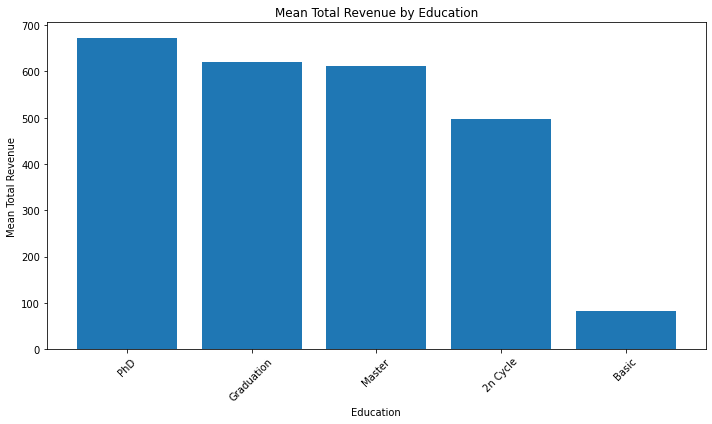

In [58]:
data_2['Total_Revenue'] = data_2[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
revenue_by_product = data_2.groupby('Education')['Total_Revenue'].mean().reset_index()
revenue_by_product_sorted = revenue_by_product.sort_values(by='Total_Revenue', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(revenue_by_product_sorted['Education'], revenue_by_product_sorted['Total_Revenue'])
plt.xlabel('Education')
plt.ylabel('Mean Total Revenue')
plt.title('Mean Total Revenue by Education')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


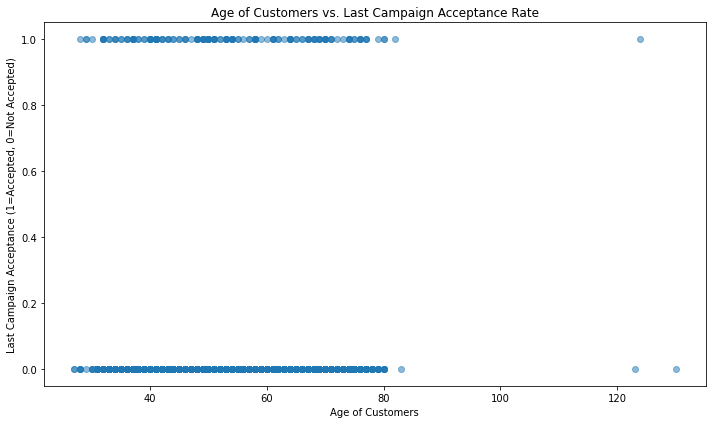

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(data_2['Age'], data_2['AcceptedCmp5'], alpha=0.5)
plt.xlabel('Age of Customers')
plt.ylabel('Last Campaign Acceptance (1=Accepted, 0=Not Accepted)')
plt.title('Age of Customers vs. Last Campaign Acceptance Rate')
plt.tight_layout()
plt.show()

In [74]:
pip install plotly


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


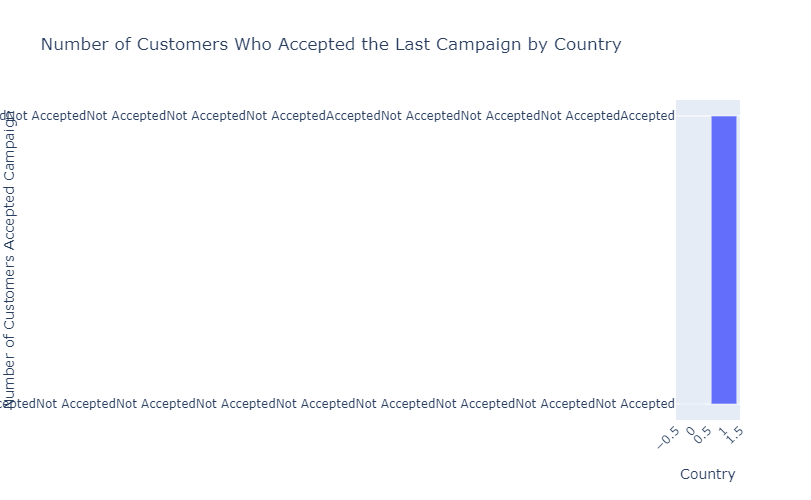

In [77]:
import plotly.graph_objects as go
campaign_acceptance_counts = data_2.groupby('Country_CA')['Accepted_Last_Campaign'].sum()
fig = go.Figure(data=go.Bar(x=campaign_acceptance_counts.index, y=campaign_acceptance_counts.values))
fig.update_layout(title='Number of Customers Who Accepted the Last Campaign by Country',
                  xaxis_title='Country',
                  yaxis_title='Number of Customers Accepted Campaign',
                  xaxis_tickangle=-45,
                  width=800, height=500)
fig.show()


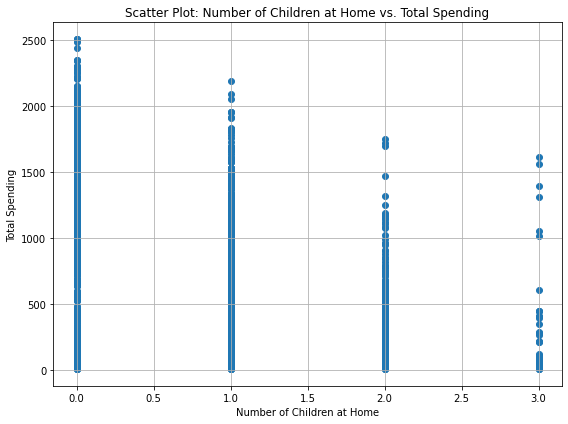

In [78]:
plt.figure(figsize=(8, 6))
plt.scatter(data_2['Total_Children'], data_2['Total_Spending'])
plt.xlabel('Number of Children at Home')
plt.ylabel('Total Spending')
plt.title('Scatter Plot: Number of Children at Home vs. Total Spending')
plt.grid(True)
plt.tight_layout()

# Step 2: Show the scatter plot
plt.show()


In [88]:
data_2['Dt_Customer'] = pd.to_datetime(data_2['Dt_Customer'])
complaints_last_2_years = data_2[data_2['Dt_Customer'] >= (pd.to_datetime('today') - pd.DateOffset(years=2))]
if complaints_last_2_years.empty:
    print("There are no customer complaints in the last 2 years.")
else:
   
    pass


There are no customer complaints in the last 2 years.
